<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Podcast%20topic%20classification/Evaluation/Topics_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topic models

Respecto a los dos modelos de tópicos implementados evaluaremos el modelo de *LDA* ya que la libreria **`gensim`** permite calcular fácilmente la métrica "coherence", la cual mide qué tan interpretables son los tópicos obtenidos para los seres humanos. Así que usando **`gensim.models.CoherenceModel`** se tiene:

In [ ]:
coherence_model_lda = CoherenceModel(model=lda, corpus = corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  -0.2983952940412554


El anterior es el valor obtenido de la prueba al modelo implementado celdas atrás, así que para compararlo realizamos el modelo para diferente número de tópicos y realizamos la prueba de *Coherence*:

In [ ]:
id2word = corpora.Dictionary(text)
corpus = [id2word.doc2bow(i) for i in text]
coherence = []
for i in range(1, 31, 2):
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                 id2word=id2word,
                                 num_topics=i, 
                                 random_state=100,
                                 passes=10,
                                 per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda, corpus = corpus, dictionary=id2word, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence.append(coherence_lda)

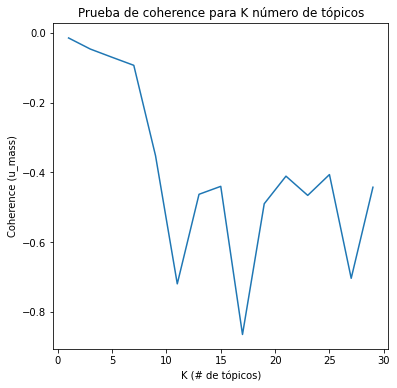

In [ ]:
plt.figure(figsize = (6,6))
plt.plot(range(1, 31, 2), coherence)
plt.title('Prueba de coherence para K número de tópicos')
plt.xlabel('K (# de tópicos)')
plt.ylabel('Coherence (u_mass)');

Teniendo en cuenta que la métrica calculada debe ser la mayor posible para tener los mejores resultados, la anterior gráfica deja ver que con un menor número de tópicos los resultados son más favorables. Es aproximadamente hasta un valor de 7 tópicos que la curva decrece abruptamente, así que la región entre 1 y 7 tópicos parece la más prudente para escoger un número de tópicos, rango dentro del cual se encuentra el número de podcasts usado.